In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [33]:
# Load dataset 
data = pd.read_excel('StressLevelDataset.xlsx')
data

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,academic_performance
0,14,20,0,11,2,1,2,4,2,3,...,2,2,3,3,2,3,3,2,1,3
1,15,8,1,15,5,3,1,4,3,1,...,2,4,1,5,1,4,5,5,2,1
2,12,18,1,14,2,1,2,2,2,2,...,2,3,3,2,2,3,2,2,1,2
3,16,12,1,15,4,3,1,3,4,2,...,2,4,1,4,1,4,4,5,2,2
4,16,28,0,7,2,3,5,1,3,2,...,3,3,1,2,1,5,0,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,3,3,2,3,3,1,2
1096,9,12,0,8,0,3,0,0,0,1,...,4,1,1,1,1,3,4,3,2,0
1097,4,26,0,3,1,2,5,2,2,3,...,4,1,4,1,3,1,2,1,0,5
1098,21,0,1,19,5,3,1,4,3,1,...,1,5,1,4,1,4,4,4,2,2


In [34]:
df_num= data.select_dtypes(exclude='object')
df_num.info()
print(df_num.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  study_load                    1100 non-null   int64
 13  teacher_student_relationship  110

In [35]:
target = df_num['academic_performance']
features = df_num.drop('academic_performance', axis=1)

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=7)

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,splitter='best',max_leaf_nodes=5)
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.4393939393939394  

 Confusion Matrix:
[[ 0  2  5  0  2  0]
 [ 0 49  3  0  3  0]
 [ 0 52 51  0  8  0]
 [ 0  3 48  0  2  0]
 [ 0  2  4  0  4 43]
 [ 0  0  4  0  4 41]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.45      0.89      0.60        55
           2       0.44      0.46      0.45       111
           3       0.00      0.00      0.00        53
           4       0.17      0.08      0.11        53
           5       0.49      0.84      0.62        49

    accuracy                           0.44       330
   macro avg       0.26      0.38      0.30       330
weighted avg       0.33      0.44      0.36       330



c:\Users\kshag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kshag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kshag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=features.columns);

In [39]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'your_dataset.xlsx' with your actual file path

df = pd.read_excel('StressLevelDataset.xlsx')

# Assuming 'academic_performance' is the column of interest
academic_counts = df['academic_performance'].value_counts()

# Display the counts
print(academic_counts)


2    348
4    188
1    185
5    182
3    169
0     28
Name: academic_performance, dtype: int64


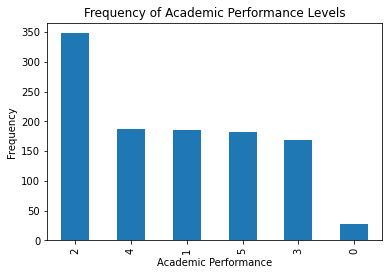

In [40]:
import matplotlib.pyplot as plt

# Plotting the counts
academic_counts.plot(kind='bar')
plt.xlabel('Academic Performance')
plt.ylabel('Frequency')
plt.title('Frequency of Academic Performance Levels')
plt.show()
